# Project 1 Portfolio Analyzer Consumer Stocks VS. Tech Stocks

We will be projecting future returns of a portfolio comprised of consumer stocks as well as a a portfolio comprised of tech stocks over a 10 year period in order to evaluate the better long term buy. The asset allocation between between stocks and bonds will remain the same between both portfolios.

To better assess historical trends between these two sectors, we will be focusing in on the following large cap stocks from each sector.

# Consumer Stocks:             

* P&G
* Johnson and Johnson
* Walmart
* Kellogg
* Coca Cola

# Tech Stocks:

* Amazon 
* MSFT
* Google
* AAPL
* NVIDIA



In [1]:
# import necessary Libraries and dependecies
import pandas as pd
import yfinance as yf
from pathlib import Path
import numpy as np
import os
import requests
import json
import dotenv
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
##pip install PyPortfolioOpt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from matplotlib.ticker import FuncFormatter

%matplotlib inline

## Tech Stocks and Consumer Stocks Data 

In [2]:
# compose data into seperate dataframes
all_stocks = pd.read_csv('Resources/newstocks.csv', header=1)
all_stocks= all_stocks.iloc[:, 0:12]
all_stocks = all_stocks.rename(columns={"Unnamed: 0":"Date"})
all_stocks = all_stocks.drop(all_stocks.index[0])
all_stocks = all_stocks.set_index("Date")
all_stocks = all_stocks.fillna(0)
all_stocks.head()

,AAPL,AMZN,GOOGL,JNJ,K,KO,MSFT,NVDA,PG,WMT,^GSPC
Date,,,,,,,,,,,
2005-01-03,0.961916,2.2260,5.072823,37.560463,25.440712,11.964916,18.813692,1.803077,33.111027,36.302994,1202.079956
2005-01-04,0.971795,2.1070,4.867367,37.441048,25.348959,11.797858,18.884058,1.718199,32.697063,36.214542,1188.050049
2005-01-05,0.980306,2.0885,4.842593,37.417137,25.503796,11.743134,18.841837,1.734257,33.039032,36.262180,1183.739990
2005-01-06,0.981066,2.0525,4.718468,37.524628,25.538202,11.841061,18.820728,1.717435,33.201012,36.779320,1187.890015
2005-01-07,1.052499,2.1160,4.851101,37.387280,25.354683,11.855467,18.764448,1.684554,33.548973,36.738506,1186.189941


In [3]:
# avg tech stocks put into dataframe
tech_stocks = all_stocks.loc[:, ['AAPL','AMZN', 'GOOGL','MSFT','NVDA']]
AVG_TECH = pd.DataFrame()
AVG_TECH['AVG_TECH'] = (tech_stocks.iloc[:, 0] + tech_stocks.iloc[:, 1] + tech_stocks.iloc[:, 2] + tech_stocks.iloc[:, 3] + tech_stocks.iloc[:, 4])/5
display(AVG_TECH.head())
display(tech_stocks.head())


,AVG_TECH
Date,
2005-01-03,5.775502
2005-01-04,5.709684
2005-01-05,5.697499
2005-01-06,5.658040
2005-01-07,5.693720


,AAPL,AMZN,GOOGL,MSFT,NVDA
Date,,,,,
2005-01-03,0.961916,2.2260,5.072823,18.813692,1.803077
2005-01-04,0.971795,2.1070,4.867367,18.884058,1.718199
2005-01-05,0.980306,2.0885,4.842593,18.841837,1.734257
2005-01-06,0.981066,2.0525,4.718468,18.820728,1.717435
2005-01-07,1.052499,2.1160,4.851101,18.764448,1.684554


In [4]:
# consumer avg put into dataframe
consumer_stocks = all_stocks.loc[:, ['JNJ','K','KO','PG','WMT']]
AVG_CONS = pd.DataFrame()
AVG_CONS['AVG_CONS'] = (consumer_stocks.iloc[:, 0] + consumer_stocks.iloc[:, 1] + consumer_stocks.iloc[:, 2] + consumer_stocks.iloc[:, 3] + consumer_stocks.iloc[:, 4])/5
display(AVG_CONS.head())
display(consumer_stocks.head())


,AVG_CONS
Date,
2005-01-03,28.876022
2005-01-04,28.699894
2005-01-05,28.793056
2005-01-06,28.976844
2005-01-07,28.976982


,JNJ,K,KO,PG,WMT
Date,,,,,
2005-01-03,37.560463,25.440712,11.964916,33.111027,36.302994
2005-01-04,37.441048,25.348959,11.797858,32.697063,36.214542
2005-01-05,37.417137,25.503796,11.743134,33.039032,36.262180
2005-01-06,37.524628,25.538202,11.841061,33.201012,36.779320
2005-01-07,37.387280,25.354683,11.855467,33.548973,36.738506


In [5]:
# compose SP500 dataframe
sp_500 = all_stocks.loc[:, ['^GSPC']]
sp_500.head()

,^GSPC
Date,
2005-01-03,1202.079956
2005-01-04,1188.050049
2005-01-05,1183.739990
2005-01-06,1187.890015
2005-01-07,1186.189941


<AxesSubplot:title={'center':'Share Price from 2005 to 2023'}, xlabel='Date', ylabel='Share Price'>

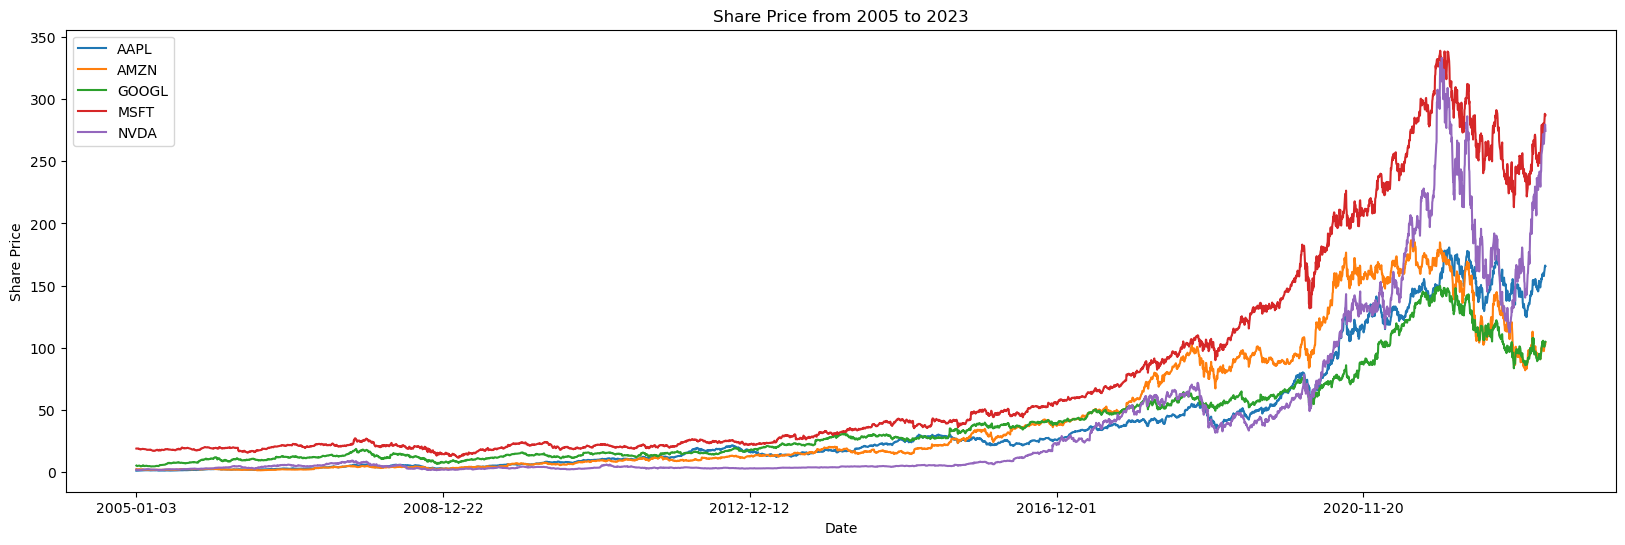

In [6]:
# plot tech stocks
tech_stocks.plot(figsize=(20,6), title='Share Price from 2005 to 2023', legend=True, ylabel= "Share Price")

<AxesSubplot:title={'center':'Share Price from 2005 to 2023'}, xlabel='Date', ylabel='Share Price'>

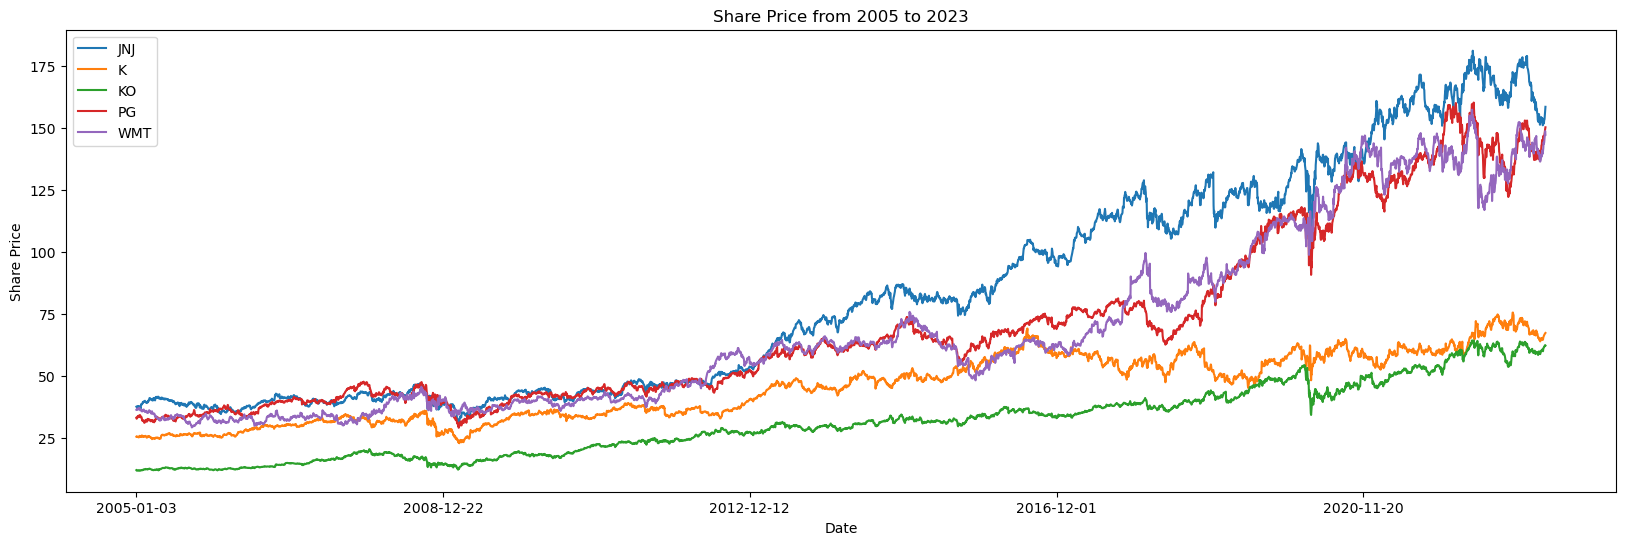

In [7]:
# plot consumer stocks
consumer_stocks.plot(figsize=(20,6), title='Share Price from 2005 to 2023', legend=True, ylabel= "Share Price")

<AxesSubplot:title={'center':'Average Share Price from 2005 to 2023'}, xlabel='Date', ylabel='Share Price'>

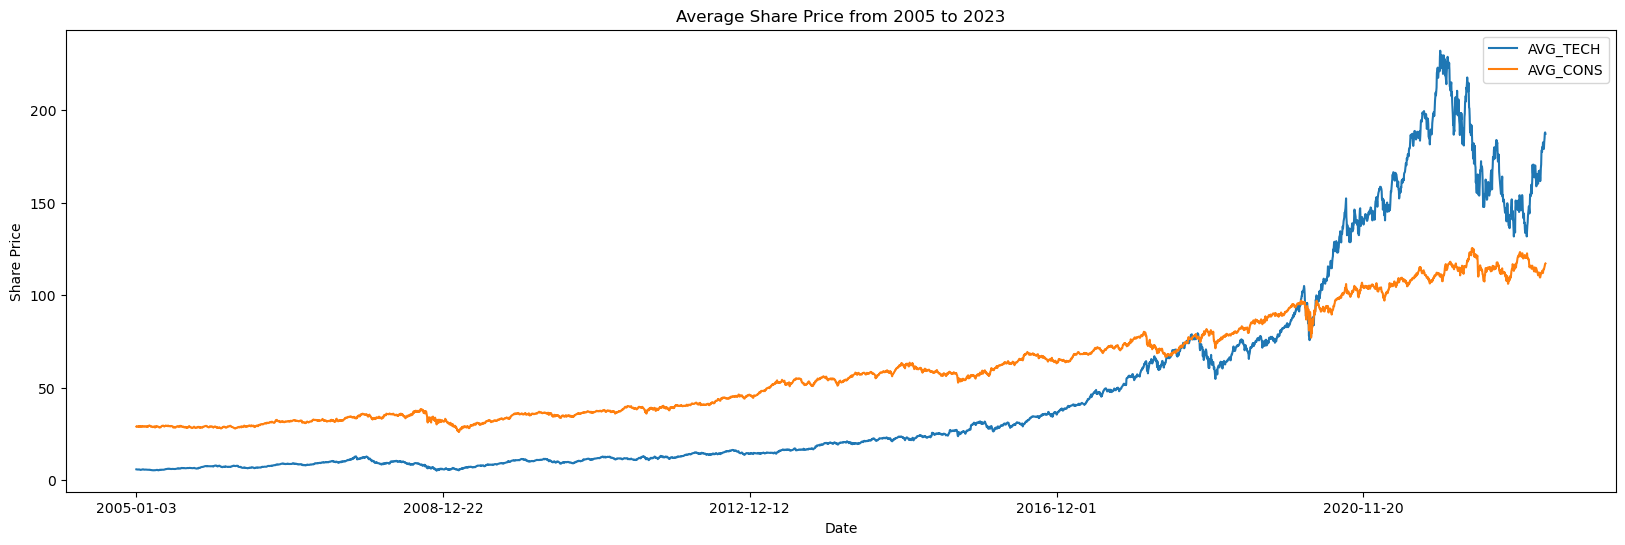

In [8]:
# plot avg tech datafra,e with avg consumer dataframe
ax = AVG_TECH.plot(figsize=(20,6), title='Average Share Price from 2005 to 2023', legend=True, ylabel= "Share Price")
AVG_CONS.plot(ax=ax)

# Daily Returns Tech Stocks

In [9]:
# calculate daily returns for tech stocks
display(tech_stocks.head())
daily_returns_tech_stocks = tech_stocks.pct_change()
daily_returns_tech_stocks = daily_returns_tech_stocks.fillna(0)
display(daily_returns_tech_stocks.head())
daily_returns_18_year_tech = daily_returns_tech_stocks.loc["2005-01-03":"2023-04-03"]
daily_returns_18_year_tech.describe()

,AAPL,AMZN,GOOGL,MSFT,NVDA
Date,,,,,
2005-01-03,0.961916,2.2260,5.072823,18.813692,1.803077
2005-01-04,0.971795,2.1070,4.867367,18.884058,1.718199
2005-01-05,0.980306,2.0885,4.842593,18.841837,1.734257
2005-01-06,0.981066,2.0525,4.718468,18.820728,1.717435
2005-01-07,1.052499,2.1160,4.851101,18.764448,1.684554


,AAPL,AMZN,GOOGL,MSFT,NVDA
Date,,,,,
2005-01-03,0.000000,0.000000,0.000000,0.000000,0.000000
2005-01-04,0.010270,-0.053459,-0.040501,0.003740,-0.047074
2005-01-05,0.008758,-0.008780,-0.005090,-0.002236,0.009346
2005-01-06,0.000776,-0.017237,-0.025632,-0.001120,-0.009700
2005-01-07,0.072811,0.030938,0.028109,-0.002990,-0.019146


,AAPL,AMZN,GOOGL,MSFT,NVDA
count,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000
mean,0.001338,0.001126,0.000839,0.000745,0.001566
std,0.020789,0.024333,0.019036,0.017398,0.030553
min,-0.179195,-0.218220,-0.116341,-0.147390,-0.307266
25%,-0.008574,-0.009993,-0.007899,-0.007243,-0.013555
50%,0.001079,0.000556,0.000698,0.000397,0.001437
75%,0.012025,0.012269,0.009858,0.008890,0.016391
max,0.139049,0.269497,0.199915,0.186046,0.298067


# Daily Returns Average for Tech Stocks

In [10]:
# calculate daily returns avg for tech stocks
display(AVG_TECH.head())
daily_returns_avgtech_stocks = AVG_TECH.pct_change()
daily_returns_avgtech_stocks = daily_returns_avgtech_stocks.fillna(0)
display(daily_returns_avgtech_stocks.head())
daily_returns_18_year_avgtech = daily_returns_avgtech_stocks.loc["2005-01-03":"2023-04-03"]
display(daily_returns_18_year_avgtech.describe())

,AVG_TECH
Date,
2005-01-03,5.775502
2005-01-04,5.709684
2005-01-05,5.697499
2005-01-06,5.658040
2005-01-07,5.693720


,AVG_TECH
Date,
2005-01-03,0.000000
2005-01-04,-0.011396
2005-01-05,-0.002134
2005-01-06,-0.006926
2005-01-07,0.006306


,AVG_TECH
count,4594.000000
mean,0.000894
std,0.016454
min,-0.125902
25%,-0.006495
50%,0.001251
75%,0.008952
max,0.163917


# Daily Returns Consumer Stocks

In [11]:
# calculate daily returns for consumer stocks
display(consumer_stocks.head())
daily_returns_consumer_stocks = consumer_stocks.pct_change()
daily_returns_consumer_stocks = daily_returns_consumer_stocks.fillna(0)
display(daily_returns_consumer_stocks.head())
daily_returns_18_year_consumer = daily_returns_consumer_stocks.loc["2005-01-03":"2023-04-03"]
daily_returns_18_year_consumer.describe()

,JNJ,K,KO,PG,WMT
Date,,,,,
2005-01-03,37.560463,25.440712,11.964916,33.111027,36.302994
2005-01-04,37.441048,25.348959,11.797858,32.697063,36.214542
2005-01-05,37.417137,25.503796,11.743134,33.039032,36.262180
2005-01-06,37.524628,25.538202,11.841061,33.201012,36.779320
2005-01-07,37.387280,25.354683,11.855467,33.548973,36.738506


,JNJ,K,KO,PG,WMT
Date,,,,,
2005-01-03,0.000000,0.000000,0.000000,0.000000,0.000000
2005-01-04,-0.003179,-0.003607,-0.013962,-0.012502,-0.002436
2005-01-05,-0.000639,0.006108,-0.004639,0.010459,0.001315
2005-01-06,0.002873,0.001349,0.008339,0.004903,0.014261
2005-01-07,-0.003660,-0.007186,0.001217,0.010480,-0.001110


,JNJ,K,KO,PG,WMT
count,4594.000000,4594.000000,4594.000000,4594.000000,4594.000000
mean,0.000370,0.000286,0.000428,0.000395,0.000389
std,0.010834,0.012199,0.011684,0.011543,0.012822
min,-0.100379,-0.109194,-0.096725,-0.087374,-0.113757
25%,-0.004549,-0.005373,-0.004815,-0.004793,-0.005704
50%,0.000256,0.000481,0.000495,0.000430,0.000471
75%,0.005667,0.006170,0.005894,0.005889,0.006429
max,0.122292,0.106458,0.138795,0.120090,0.117085


# Daily Returns Average for Consumer Stocks

In [12]:
# calculate daily returns average for consumer stocks
display(AVG_CONS.head())
daily_returns_avgconsumer_stocks = AVG_CONS.pct_change()
daily_returns_avgconsumer_stocks = daily_returns_avgconsumer_stocks.fillna(0)
display(daily_returns_avgconsumer_stocks.head())
daily_returns_18_year_avgconsumer = daily_returns_avgconsumer_stocks.loc["2005-01-03":"2023-04-03"]
daily_returns_18_year_avgconsumer.describe()

,AVG_CONS
Date,
2005-01-03,28.876022
2005-01-04,28.699894
2005-01-05,28.793056
2005-01-06,28.976844
2005-01-07,28.976982


,AVG_CONS
Date,
2005-01-03,0.000000
2005-01-04,-0.006099
2005-01-05,0.003246
2005-01-06,0.006383
2005-01-07,0.000005


,AVG_CONS
count,4594.000000
mean,0.000346
std,0.009088
min,-0.074469
25%,-0.003839
50%,0.000449
75%,0.004725
max,0.089649


# Daily Returns SP500

In [13]:
# calculate daily return for sp500
display(sp_500.head())
daily_returns_sp_500 = sp_500.pct_change()
daily_returns_sp_500 = daily_returns_sp_500.fillna(0)
display(daily_returns_sp_500.head())
daily_returns_18_year_sp_500 = daily_returns_sp_500.loc["2005-01-03":"2023-04-03"]
daily_returns_18_year_sp_500.describe()

,^GSPC
Date,
2005-01-03,1202.079956
2005-01-04,1188.050049
2005-01-05,1183.739990
2005-01-06,1187.890015
2005-01-07,1186.189941


,^GSPC
Date,
2005-01-03,0.000000
2005-01-04,-0.011671
2005-01-05,-0.003628
2005-01-06,0.003506
2005-01-07,-0.001431


,^GSPC
count,4594.000000
mean,0.000346
std,0.012412
min,-0.119841
25%,-0.004140
50%,0.000697
75%,0.005718
max,0.115800


<AxesSubplot:title={'center':'Large Cap Tech Stocks Cumulative Returns from 2005-2023'}, xlabel='Date'>

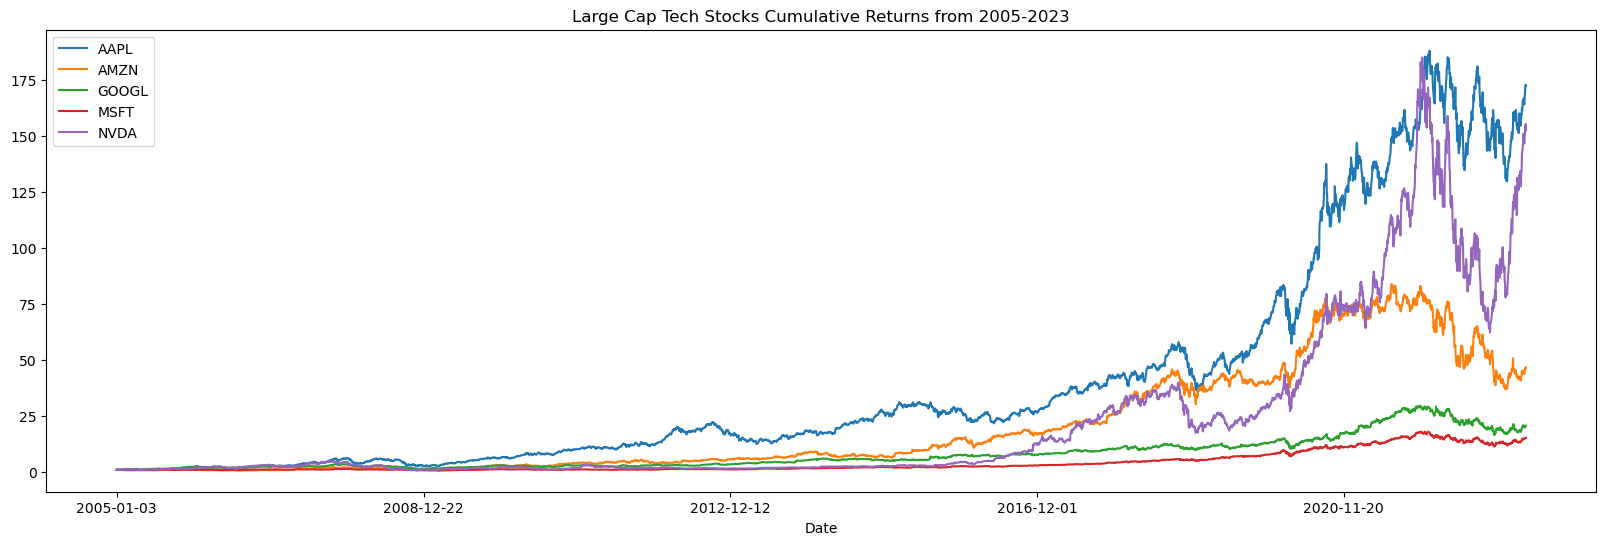

In [14]:
# plot cumulative returns for tecch stocks
cumulative_returns_tech = (1 + daily_returns_tech_stocks).cumprod()
cumulative_returns_tech.plot(figsize=(20,6), title="Large Cap Tech Stocks Cumulative Returns from 2005-2023")

<AxesSubplot:title={'center':'Large Cap Consumer Stocks Cumulative Returns from 2005-2023'}, xlabel='Date'>

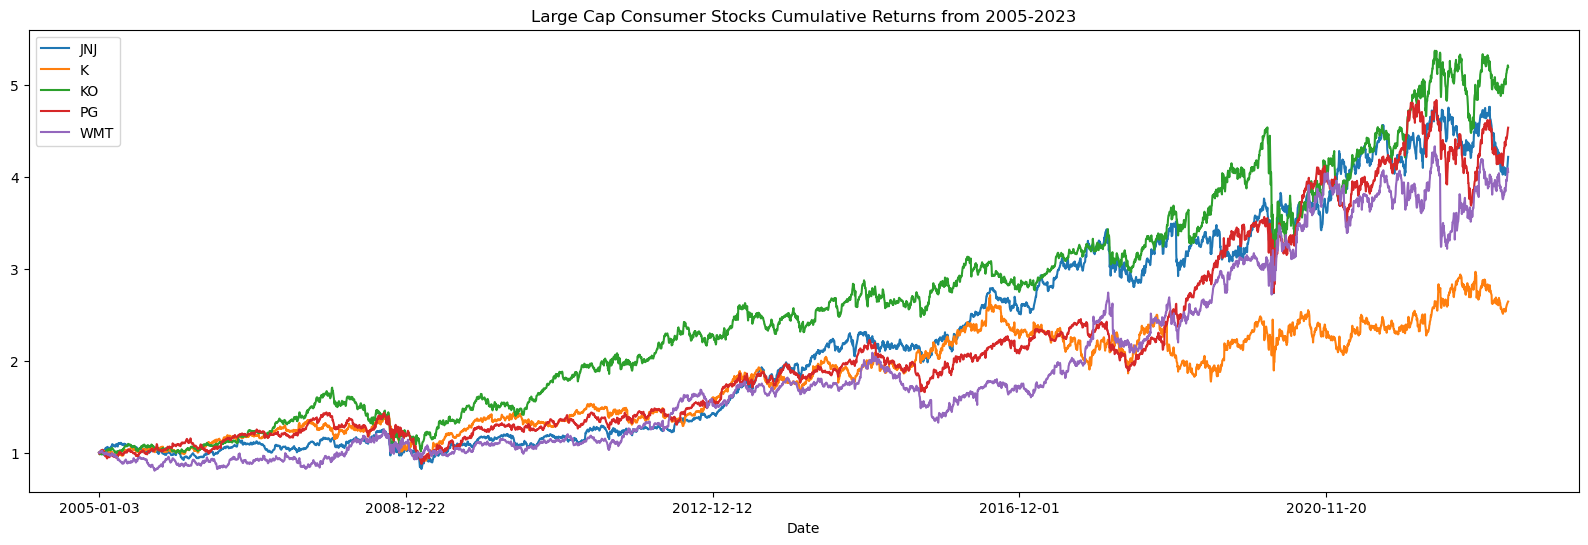

In [15]:
# plot cumulative consumer returns
cumulative_returns_consumer = (1 + daily_returns_consumer_stocks).cumprod()
cumulative_returns_consumer.plot(figsize=(20,6), title="Large Cap Consumer Stocks Cumulative Returns from 2005-2023")

<AxesSubplot:title={'center':'Large Cap Stocks Cumulative Returns from 2005-2023'}, xlabel='Date'>

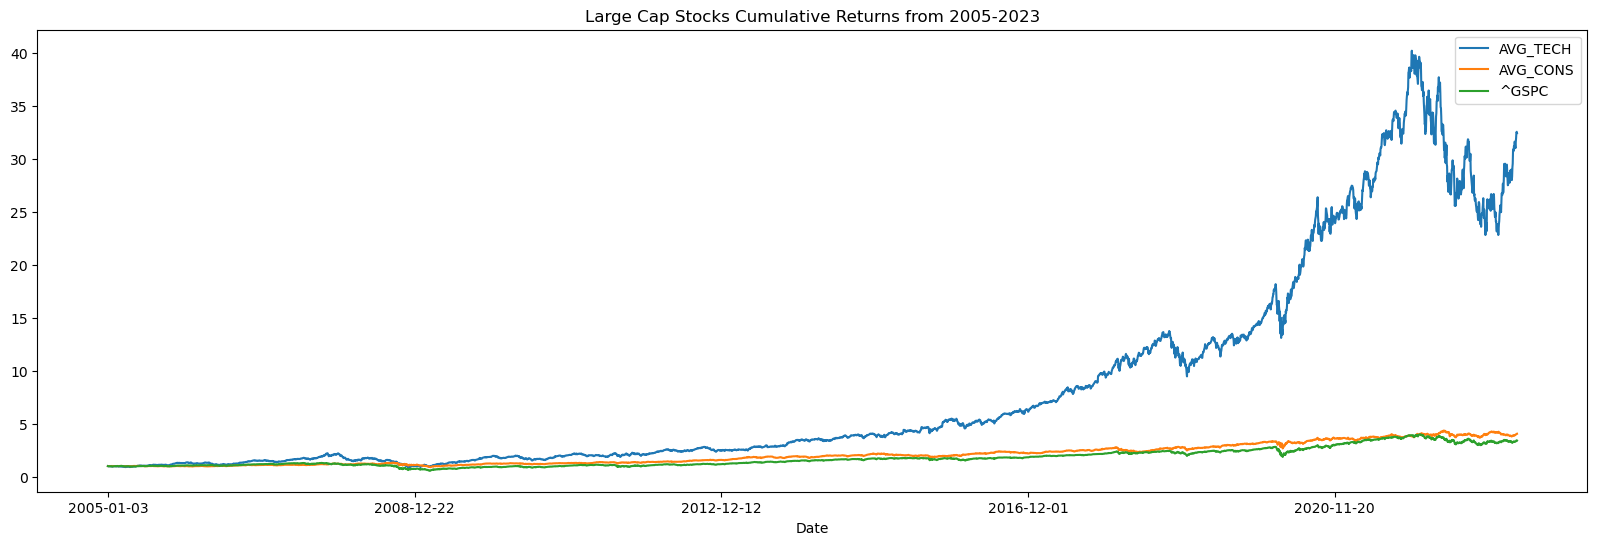

In [16]:
# plot all cumulative returns, AVG tech, AVG consumer and AVG sp500
cumulative_returns_avgtech = (1 + daily_returns_avgtech_stocks).cumprod()
cumulative_returns_avgconsumer = (1 + daily_returns_avgconsumer_stocks).cumprod()
cumulative_returns_sp_500 = (1 + daily_returns_sp_500).cumprod()
ax = cumulative_returns_avgtech.plot(figsize=(20,6), title="Large Cap Stocks Cumulative Returns from 2005-2023")
cumulative_returns_avgconsumer.plot(ax=ax)
cumulative_returns_sp_500.plot(ax=ax)

## Annualized Returns/Annualized Std. Dev

In [17]:
#Tech Stocks Annualized Returns
annualized_average_annual_return_tech = daily_returns_18_year_tech.mean() * 252

display(annualized_average_annual_return_tech)

#Tech Stocks Annualized Std. Dev
tech_stocks_standard_deviation = daily_returns_18_year_tech.std()
annualized_tech_stocks_standard_deviation = tech_stocks_standard_deviation * np.sqrt(252)

display(annualized_tech_stocks_standard_deviation)

#Consumer Stocks Annualized Returns

annualized_average_annual_return_consumer = daily_returns_18_year_consumer.mean() * 252

display(annualized_average_annual_return_consumer)

#Consumer Stocks Annualized Std. Dev

consumer_stocks_standard_deviation = daily_returns_18_year_consumer.std()
annualized_consumer_stocks_standard_deviation = consumer_stocks_standard_deviation * np.sqrt(252)

display(annualized_consumer_stocks_standard_deviation)

#SP 500 Annualized Returns

annualized_average_annual_return_sp_500 = daily_returns_18_year_sp_500.mean() * 252

display(annualized_average_annual_return_sp_500)

## SP 500 Annualized Std. Dev

sp_500_stocks_standard_deviation = daily_returns_18_year_sp_500.std()
annualized_sp_500_standard_deviation = sp_500_stocks_standard_deviation * np.sqrt(252)

display(annualized_sp_500_standard_deviation)


AAPL     0.337246
AMZN     0.283875
GOOGL    0.211302
MSFT     0.187622
NVDA     0.394615
dtype: float64

AAPL     0.330021
AMZN     0.386275
GOOGL    0.302193
MSFT     0.276191
NVDA     0.485017
dtype: float64

JNJ    0.093189
K      0.072015
KO     0.107808
PG     0.099483
WMT    0.098038
dtype: float64

JNJ    0.171983
K      0.193658
KO     0.185478
PG     0.183240
WMT    0.203545
dtype: float64

^GSPC    0.087103
dtype: float64

^GSPC    0.19704
dtype: float64

# Variance For Tech Stocks

In [18]:
# calculate variance for tech stocks
aapl_variance = daily_returns_tech_stocks['AAPL'].var()
amzn_variance = daily_returns_tech_stocks['AMZN'].var()
googl_variance = daily_returns_tech_stocks['GOOGL'].var()
msft_variance = daily_returns_tech_stocks['MSFT'].var()
nvda_variance = daily_returns_tech_stocks['NVDA'].var()
display(aapl_variance, amzn_variance, googl_variance, msft_variance, nvda_variance)

0.0004321083598667177

0.0005920107364703379

0.00036230524509008505

0.00030263878960066647

0.0009333796603066496

# Covariance for Tech Stocks

In [19]:
# calculate covariance for tech stocks
aapl_cov = daily_returns_tech_stocks['AAPL'].cov(daily_returns_sp_500['^GSPC'])
amzn_cov = daily_returns_tech_stocks['AMZN'].cov(daily_returns_sp_500['^GSPC'])
googl_cov = daily_returns_tech_stocks['GOOGL'].cov(daily_returns_sp_500['^GSPC'])
msft_cov = daily_returns_tech_stocks['MSFT'].cov(daily_returns_sp_500['^GSPC'])
nvda_cov = daily_returns_tech_stocks['NVDA'].cov(daily_returns_sp_500['^GSPC'])
display(aapl_cov, amzn_cov, googl_cov, msft_cov, nvda_cov)


0.00016565094046531325

0.00017371279444835182

0.00015645311262528047

0.00016043044302510768

0.00023301952887447536

# Beta For Tech Stocks

In [20]:
# calculate beta for tech stocks
aapl_beta = aapl_cov / aapl_variance
amzn_beta = amzn_cov / amzn_variance
googl_beta = googl_cov / googl_variance
msft_beta = msft_cov / msft_variance
nvda_beta = nvda_cov / nvda_variance
display(aapl_beta, amzn_beta, googl_beta, msft_beta, nvda_beta)

0.3833550929595708

0.29342845280822966

0.4318267945206792

0.5301053550894667

0.2496513892298873

# Rolling Metrics for Tech Stocks

<AxesSubplot:xlabel='Date'>

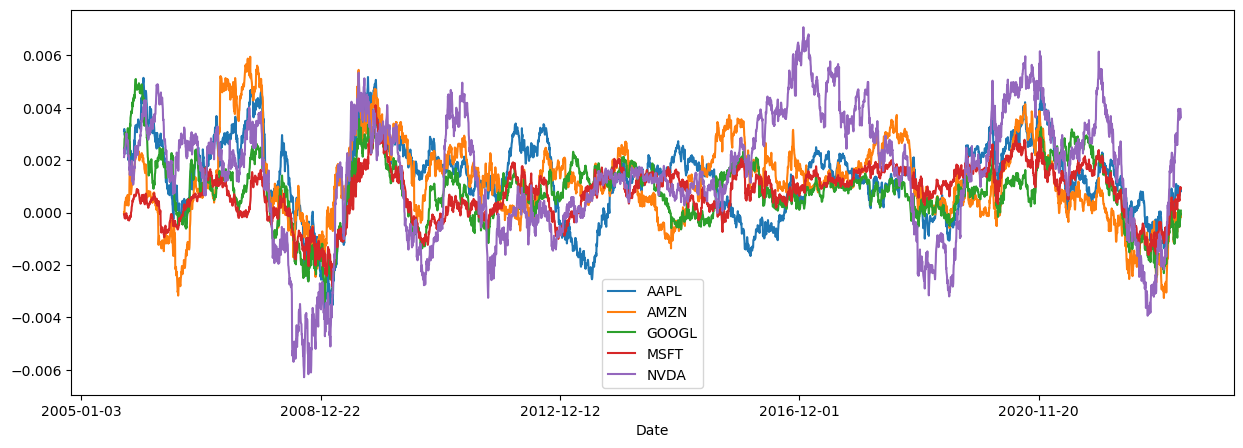

In [21]:
# plot/visualize rolling metrics for tech
daily_returns_tech_stocks.rolling(window=180).mean().plot(figsize=(15,5))

# Variance For Consumer Stocks

In [22]:
# calculate variance for consumer stocks
jnj_variance = daily_returns_consumer_stocks['JNJ'].var()
ko_variance = daily_returns_consumer_stocks['KO'].var()
k_variance = daily_returns_consumer_stocks['K'].var()
pg_variance = daily_returns_consumer_stocks['PG'].var()
wmt_variance = daily_returns_consumer_stocks['WMT'].var()
display(jnj_variance, ko_variance, k_variance, pg_variance, wmt_variance)

0.00011737054889876605

0.00013648876585972588

0.0001487915137491404

0.0001332174703796676

0.0001643943975350032

# Covariance For Consumer Stocks

In [23]:
# calculate covariance for consumer stocks
jnj_cov = daily_returns_consumer_stocks['JNJ'].cov(daily_returns_sp_500['^GSPC'])
ko_cov = daily_returns_consumer_stocks['KO'].cov(daily_returns_sp_500['^GSPC'])
k_cov = daily_returns_consumer_stocks['K'].cov(daily_returns_sp_500['^GSPC'])
pg_cov = daily_returns_consumer_stocks['PG'].cov(daily_returns_sp_500['^GSPC'])
wmt_cov = daily_returns_consumer_stocks['WMT'].cov(daily_returns_sp_500['^GSPC'])
display(jnj_cov, ko_cov, k_cov, pg_cov, wmt_cov)

8.567987836380182e-05

9.097774911908997e-05

6.910592259643956e-05

8.860412358290759e-05

8.161641987785182e-05

# Beta For Consumer Stocks

In [24]:
# calculate beta for consumer stocks
jnj_beta = jnj_cov / jnj_variance
ko_beta = ko_cov / ko_variance
k_beta = k_cov / k_variance
pg_beta = pg_cov / pg_variance
wmt_beta = wmt_cov / wmt_variance

display(jnj_beta, ko_beta, k_beta, pg_beta, wmt_beta)

0.7299946977133256

0.6665585152450633

0.4644480108788382

0.6651088879738317

0.49646716130015245

# Rolling Metrics For Consumer Stocks

<AxesSubplot:xlabel='Date'>

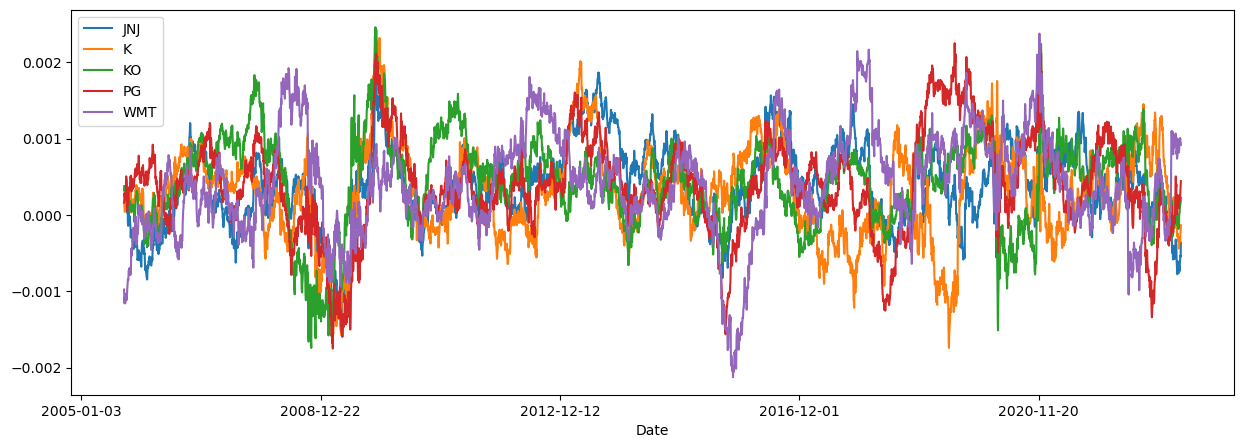

In [25]:
# plot/visualize rolling metrics for consumer stocks
daily_returns_consumer_stocks.rolling(window=180).mean().plot(figsize=(15,5))

# SP500 and Tech

<AxesSubplot:xlabel='Date'>

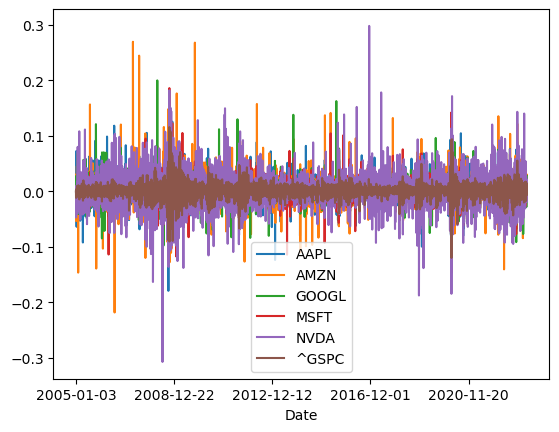

In [26]:
# plot daily returns for sp500 and tech
ax = daily_returns_tech_stocks.plot()
daily_returns_sp_500.plot(ax=ax)

# SP500 and Consumer

<AxesSubplot:xlabel='Date'>

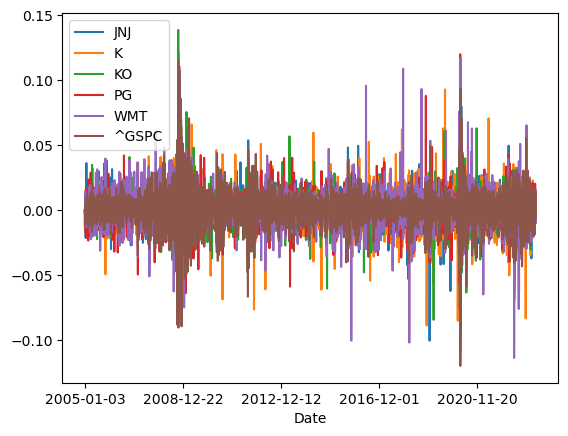

In [27]:
# plot sp500 and consumer daily returns
ax = daily_returns_consumer_stocks.plot()
daily_returns_sp_500.plot(ax=ax)

## Sharpe Ratio

In [28]:
# calculate sharpe ratios for all stocks
sharpe_ratios_tech = annualized_average_annual_return_tech/annualized_tech_stocks_standard_deviation

display(sharpe_ratios_tech.sort_values())

sharpe_ratios_consumer = annualized_average_annual_return_consumer/annualized_consumer_stocks_standard_deviation

display(sharpe_ratios_consumer.sort_values())

sharpe_ratio_sp_500 = annualized_average_annual_return_sp_500/annualized_sp_500_standard_deviation

display(sharpe_ratio_sp_500.sort_values())


MSFT     0.679320
GOOGL    0.699230
AMZN     0.734904
NVDA     0.813611
AAPL     1.021894
dtype: float64

K      0.371869
WMT    0.481650
JNJ    0.541852
PG     0.542911
KO     0.581245
dtype: float64

^GSPC    0.442058
dtype: float64

## Tech Stock Portfolio Simulation

##### The below simulation tracks the VGT technology ETF using historical closing prices from 2013 to 2023. VGT is an ETF that has a relatively low expense ratio whose purpose is to seek capital appreciation by tracking large cap growth tech stocks and we believe it would be a good representative of the technology industry. Using the given time frame of Jan 1 2013 to Jan 2023, we are able to capture a significant amount of historical data to project future portfolio valuations. The 80/20 asset split between stocks/bonds is representative of a more aggressive investing strategy. 

In [30]:

load_dotenv()

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_secret_key)


alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

tickers = ["AGG","VGT"]

timeframe = "1DAY"

start_date = pd.Timestamp("2013-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-01-01", tz="America/New_York").isoformat()

tech_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

AGG = tech_portfolio[tech_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

VGT = tech_portfolio[tech_portfolio['symbol']=='VGT'].drop('symbol', axis=1)

tech_portfolio = pd.concat([AGG,VGT],axis=1, keys=['AGG','VGT'])

tech_portfolio.head()

AGG                                      \
                             open      high     low    close   volume   
timestamp                                                               
2015-12-01 05:00:00+00:00  108.54  108.8400  108.43  108.820  4259986   
2015-12-02 05:00:00+00:00  108.73  108.7799  108.61  108.685  2462787   
2015-12-03 05:00:00+00:00  108.41  108.4100  107.81  107.890  4634020   
2015-12-04 05:00:00+00:00  108.05  108.3000  108.00  108.240  2182057   
2015-12-07 05:00:00+00:00  108.30  108.5800  108.23  108.400  2143773   

                                                      VGT                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2015-12-01 05:00:00+00:00       15562  108.754152  112.10  112.8000  112.000   
2015-12-02 05:00:00+00:00       11581  108.684692  112.83  113.3199  112.040   
2015-12-03 05:00:00+00:00       16801  108.040315  112.76  112.7800  110.051   
2015-12-04 05:00:00+00:00        9796  108.192232  110.93  113.2503  110.700   
2015-12-07 05:00:00+00:00        9104  108.460067  112.99  112.9900  111.830   

                                                                   
                            close  volume trade_count        vwap  
timestamp                                                          
2015-12-01 05:00:00+00:00  112.77  667176        2521  112.525030  
2015-12-02 05:00:00+00:00  112.17  369281        2774  112.826360  
2015-12-03 05:00:00+00:00  110.61  307682        2573  111.098646  
2015-12-04 05:00:00+00:00  113.02  357962        2953  112.564342  
2015-12-07 05:00:00+00:00  112.29  272555        2111  112.250081

In [31]:
MC_10year_tech = MCSimulation(
    portfolio_data = tech_portfolio,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10)

MC_10year_tech.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\kashb\Fintech-Workspace\Project_1\Project_1_Portfolio_Analysis-main\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.981780,1.009345,1.002112,1.007112,1.010685,0.991870,1.014165,1.024126,0.981570,1.010904,...,1.009424,1.000142,0.990760,0.991965,1.009698,1.005689,0.999629,1.004830,0.996142,1.014860
2,0.977452,1.004020,1.014504,0.993202,1.003682,1.012407,1.014215,1.016876,0.993164,0.999786,...,1.010310,0.988529,0.999286,0.990505,1.016234,0.996609,1.000997,1.012889,1.007835,1.021877
3,0.978297,0.977891,0.997333,1.010322,0.992602,1.014769,1.029313,1.003467,0.992392,0.998968,...,1.010705,0.981705,1.000112,0.993017,1.025468,0.977392,1.000317,1.000259,1.010861,1.055650
4,0.966076,0.989010,1.010791,1.031476,0.987873,1.017785,1.019850,1.008388,0.988185,0.998298,...,1.005957,0.977126,0.981287,1.005151,1.013690,0.991856,0.995607,0.992061,1.011844,1.037133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,8.042295,3.382352,0.904050,1.355783,2.905209,3.817363,4.546063,5.852252,5.165068,4.177972,...,1.928684,0.981263,5.166941,4.863110,1.703842,3.656496,6.186309,2.875203,9.660340,2.472751
2517,7.991243,3.376753,0.917477,1.366193,2.956057,3.844798,4.582383,5.861331,5.212823,4.237230,...,1.970749,0.987102,5.192337,4.816838,1.703388,3.652869,6.127841,2.956442,9.899520,2.434011
2518,7.965182,3.371718,0.933408,1.404365,2.953733,3.839927,4.669045,5.836316,5.163889,4.181368,...,1.969567,0.997575,5.195729,4.824436,1.704200,3.648673,6.136294,2.969105,9.914579,2.456396
2519,7.778582,3.403180,0.932962,1.365419,3.012398,3.812183,4.696181,5.803055,5.112896,4.143687,...,1.952815,0.988224,5.220572,4.738948,1.669014,3.716012,6.086605,3.001147,9.770907,2.464509


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

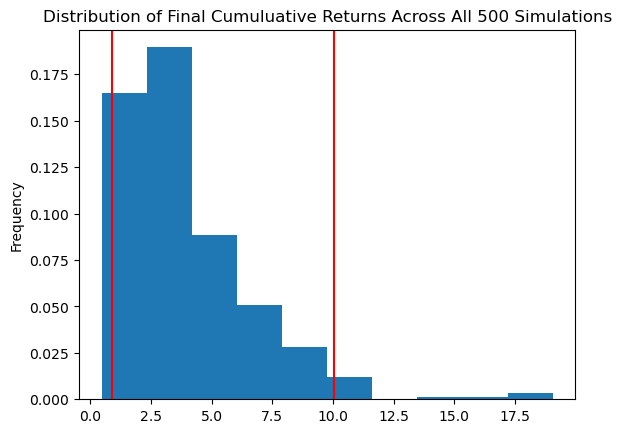

In [32]:
MC_10year_tech.plot_distribution()

In [33]:
MC_10year_tech_summary_statistics = MC_10year_tech.summarize_cumulative_return()

display(MC_10year_tech_summary_statistics)

total_tech_stocks_bonds = 50000

ci_lower_10_cumulative_return_tech = MC_10year_tech_summary_statistics[8]*total_tech_stocks_bonds
ci_upper_10_cumulative_return_tech = MC_10year_tech_summary_statistics[9]*total_tech_stocks_bonds
mean_10_cumulative_return_tech = MC_10year_tech_summary_statistics[1]*total_tech_stocks_bonds

print(f"There is a 95% chance that an initial investment of ${total_tech_stocks_bonds} in the portfolio over the next 10 years will end within the range of"
        f" ${ci_lower_10_cumulative_return_tech} and ${ci_upper_10_cumulative_return_tech}.")

print(f"The average valuation of this simulation over 10 years is ${mean_10_cumulative_return_tech}.")

count           500.000000
mean              3.913400
std               2.669174
min               0.476489
25%               2.068478
50%               3.260286
75%               5.050188
max              19.049992
95% CI Lower      0.918197
95% CI Upper     10.041382
Name: 2520, dtype: float64

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within the range of $45909.85342729972 and $502069.0982093219.
The average valuation of this simulation over 10 years is $195669.98249110175.


## Consumer stocks Portfolio Simulation

##### The below simulation tracks the FSTA ETF using historical closing prices from 2013 to 2023. FSTA is an ETF that has a relatively low expense ratio whose purpose is to track large cap consumer industry stocks and we believe it would be a good representative of the consumer industry as a whole. Using the given time frame of Jan 1 2013 to Jan 2023, we are able to capture a significant amount of historical data to project future portfolio valuations. The 80/20 asset split between stocks/bonds is representative of a more aggressive investing strategy. 

In [35]:
load_dotenv()

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_secret_key )


alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

tickers = ["AGG","FSTA"]

timeframe = "1DAY"

start_date = pd.Timestamp("2013-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-01-01", tz="America/New_York").isoformat()

consumer_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

AGG = consumer_portfolio[consumer_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

FSTA = consumer_portfolio[consumer_portfolio['symbol']=='FSTA'].drop('symbol', axis=1)

consumer_portfolio = pd.concat([AGG,FSTA],axis=1, keys=['AGG','FSTA'])

consumer_portfolio.head()

AGG                                      \
                             open      high     low    close   volume   
timestamp                                                               
2015-12-01 05:00:00+00:00  108.54  108.8400  108.43  108.820  4259986   
2015-12-02 05:00:00+00:00  108.73  108.7799  108.61  108.685  2462787   
2015-12-03 05:00:00+00:00  108.41  108.4100  107.81  107.890  4634020   
2015-12-04 05:00:00+00:00  108.05  108.3000  108.00  108.240  2182057   
2015-12-07 05:00:00+00:00  108.30  108.5800  108.23  108.400  2143773   

                                                    FSTA                    \
                          trade_count        vwap   open     high      low   
timestamp                                                                    
2015-12-01 05:00:00+00:00       15562  108.754152  29.76  29.9300  29.7600   
2015-12-02 05:00:00+00:00       11581  108.684692  29.92  29.9400  29.7101   
2015-12-03 05:00:00+00:00       16801  108.040315  29.87  29.9262  29.4700   
2015-12-04 05:00:00+00:00        9796  108.192232  29.64  30.2201  29.6400   
2015-12-07 05:00:00+00:00        9104  108.460067  30.30  30.3670  30.1861   

                                                                  
                             close volume trade_count       vwap  
timestamp                                                         
2015-12-01 05:00:00+00:00  29.9300  63720         164  29.863542  
2015-12-02 05:00:00+00:00  29.7300  63039         183  29.857146  
2015-12-03 05:00:00+00:00  29.5500  33545         173  29.672315  
2015-12-04 05:00:00+00:00  30.1900  39966         182  30.082425  
2015-12-07 05:00:00+00:00  30.2999  43583         172  30.267342

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\kashb\Fintech-Workspace\Project_1\Project_1_Portfolio_Analysis-main\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

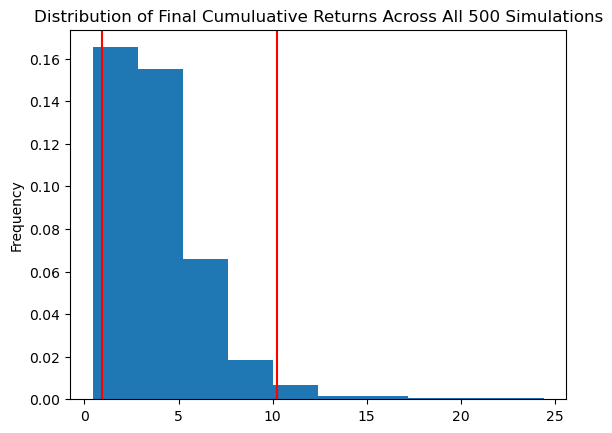

In [36]:
MC_10year_consumer = MCSimulation(
    portfolio_data = tech_portfolio,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10)

MC_10year_consumer.calc_cumulative_return()

MC_10year_consumer.plot_distribution()

In [37]:
MC_10year_consumer_summary_statistics = MC_10year_consumer.summarize_cumulative_return()

display(MC_10year_consumer_summary_statistics)

count           500.000000
mean              4.007892
std               2.721033
min               0.446579
25%               2.255464
50%               3.262390
75%               5.073765
max              24.403113
95% CI Lower      0.952774
95% CI Upper     10.240300
Name: 2520, dtype: float64

In [38]:
total_consumer_stocks_bonds = 50000
ci_lower_10_cumulative_return_consumer = MC_10year_consumer_summary_statistics[8]*total_consumer_stocks_bonds
ci_upper_10_cumulative_return_consumer = MC_10year_consumer_summary_statistics[9]*total_consumer_stocks_bonds
mean_10_cumulative_return_consumer = MC_10year_consumer_summary_statistics[1]*total_consumer_stocks_bonds
print(f"There is a 95% chance that an initial investment of {total_consumer_stocks_bonds} in the portfolio over the next 10 years will end within the range of"
        f" ${ci_lower_10_cumulative_return_consumer} and ${ci_upper_10_cumulative_return_consumer}.")

print(f"The average valuation of this simulation over 10 years is ${mean_10_cumulative_return_consumer}.")

There is a 95% chance that an initial investment of 50000 in the portfolio over the next 10 years will end within the range of $47638.70581804473 and $512014.9785701181.
The average valuation of this simulation over 10 years is $200394.57934380032.


## Benchmark Portfolio Simulation

In [39]:
load_dotenv()

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_secret_key )


alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

tickers = ["AGG","SPY"]

timeframe = "1DAY"

## use conservative time frame

start_date = pd.Timestamp("2013-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-01-01", tz="America/New_York").isoformat()

sp500_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

AGG = sp500_portfolio[sp500_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

SPY = sp500_portfolio[sp500_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

sp500_portfolio = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])

sp500_portfolio.head()

AGG                                      \
                             open      high     low    close   volume   
timestamp                                                               
2015-12-01 05:00:00+00:00  108.54  108.8400  108.43  108.820  4259986   
2015-12-02 05:00:00+00:00  108.73  108.7799  108.61  108.685  2462787   
2015-12-03 05:00:00+00:00  108.41  108.4100  107.81  107.890  4634020   
2015-12-04 05:00:00+00:00  108.05  108.3000  108.00  108.240  2182057   
2015-12-07 05:00:00+00:00  108.30  108.5800  108.23  108.400  2143773   

                                                       SPY            \
                          trade_count        vwap     open      high   
timestamp                                                              
2015-12-01 05:00:00+00:00       15562  108.754152  209.440  210.8200   
2015-12-02 05:00:00+00:00       11581  108.684692  210.615  211.0000   
2015-12-03 05:00:00+00:00       16801  108.040315  208.830  209.1500   
2015-12-04 05:00:00+00:00        9796  108.192232  206.080  209.9700   
2015-12-07 05:00:00+00:00        9104  108.460067  209.230  209.7295   

                                                                     \
                                low    close     volume trade_count   
timestamp                                                             
2015-12-01 05:00:00+00:00  209.1100  210.680   97858418      337780   
2015-12-02 05:00:00+00:00  208.2300  208.529  108069059      367013   
2015-12-03 05:00:00+00:00  204.7511  205.610  166224154      546768   
2015-12-04 05:00:00+00:00  205.9300  209.620  192878747      556731   
2015-12-07 05:00:00+00:00  207.2000  208.350  102027111      374705   

                                       
                                 vwap  
timestamp                              
2015-12-01 05:00:00+00:00  209.921410  
2015-12-02 05:00:00+00:00  209.563055  
2015-12-03 05:00:00+00:00  206.878936  
2015-12-04 05:00:00+00:00  208.178631  
2015-12-07 05:00:00+00:00  208.276128

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\kashb\Fintech-Workspace\Project_1\Project_1_Portfolio_Analysis-main\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

count           500.000000
mean              2.201943
std               1.092566
min               0.509228
25%               1.444675
50%               1.960289
75%               2.747873
max               8.263198
95% CI Lower      0.776392
95% CI Upper      4.918534
Name: 2520, dtype: float64

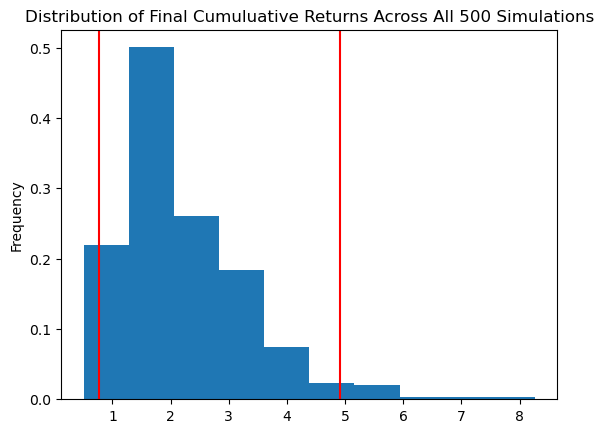

In [40]:
MC_10year_sp500 = MCSimulation(
    portfolio_data = sp500_portfolio,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10)
    
MC_10year_sp500.calc_cumulative_return()

MC_10year_sp500.plot_distribution()
    
MC_10year_sp500_summary_statistics =  MC_10year_sp500.summarize_cumulative_return()

display(MC_10year_sp500_summary_statistics)
    

In [41]:
total_stocks_bonds = 50000
ci_lower_10_cumulative_return_sp500 = MC_10year_sp500_summary_statistics[8]*total_stocks_bonds
ci_upper_10_cumulative_return_sp500 = MC_10year_sp500_summary_statistics[9]*total_stocks_bonds
mean_10_cumulative_return_sp500 = MC_10year_sp500_summary_statistics[1]*total_stocks_bonds
print(f"There is a 95% chance that an initial investment of {total_stocks_bonds} in the portfolio over the next 10 years will end within the range of"
        f" ${ci_lower_10_cumulative_return_sp500} and ${ci_upper_10_cumulative_return_sp500}.")

print(f"The average valuation of this simulation over 10 years is ${mean_10_cumulative_return_sp500}.")

There is a 95% chance that an initial investment of 50000 in the portfolio over the next 10 years will end within the range of $38819.59345096124 and $245926.68428254328.
The average valuation of this simulation over 10 years is $110097.17451577765.


##### Our initial hypothesis that centering a portfolio around tech stocks outperforming the market was disproved somewhat. Although both have outperformed the sp500 index, both consumer and tech stock portfolio simulations had yielded similar portfolio valuations. We believe that the results would be altered somewhat if different funds were used to track these industries or adjusting the timeframe to allow for a more volatility in historical NAVS. However, the main takeaway from our exercise was significance of investing etfs/index funds vs in any one stock portfolio. In this exercise we were able to reach extremely high portfolio valuations with investments in a portfolio asset allocation comprising of indvidual stocks, however this also yielded extremely high standard deviation values - indicating our previous portfolio asset allocation was not nearly diverse enough to lower volatility within the portfolio; furthermore it would be very difficult and therefore unrealistic to replicate the degree of cumulative returns projected to 10 years for a collection of a few hyper sucessful stocks as an investment strategy. Based on the above results, we would recommend for investors seeking capital appreciation to pick tech or consumer based etfs with low expense ratios and high allocations to the large cap assets we had investigated earlier, as these stocks seem to have the ability to retain value over time while also having significant enough avenues for capital appreciation. For the more conservative investor, we would recommend investing in the S&P 500, providing more modest returns but captures the market as a whole and posing fewer unsystematic risks.